In [51]:
!pip install tensorflow-gpu

In [52]:
!nvidia-smi

Sat Apr 10 18:20:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    56W / 149W |   3348MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [53]:
import tensorflow as tf

# **Import the libraries**

In [54]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout,Input, Lambda

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



# from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

import warnings
warnings.filterwarnings("ignore")

In [55]:
print("Tensorflow-version:", tensorflow.__version__)

Tensorflow-version: 2.4.1


In [56]:
size = 32
model_name  = 'handwrittern bangla letter32 Dense121.h5'
batch_size = 16
IMAGE_SIZE = [size,size ]
path = '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/'

train_path = path + 'Train'
test_path = path + 'Test'

In [57]:

folders = glob(train_path + '/*')

folders

['/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/172',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/179',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/175',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/180',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/178',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/181',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/174',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/177',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/176',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/173',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/189',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/186',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/183',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/191',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/1

In [58]:
# model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(size, size, 3,),classes=50,pooling='avg') 
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(size, size, 3,)) 
# model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(size, size, 3,)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(len(folders),activation='softmax')(x) #FC-layer

In [59]:
model = Model(inputs=model_d.input, outputs=preds)
# model.summary()

In [60]:
# don't train existing weights
# for layer in model.layers:
#     layer.trainable = False


# for layer in model.layers[:-16]:
#     layer.trainable=False
    
# for layer in model.layers[-16:]:
#     layer.trainable=True

In [61]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D (None, 38, 38, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d_6[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [62]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint(model_name, verbose=1, save_best_only=False)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [63]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (size, size),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

Found 12006 images belonging to 50 classes.


In [64]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (size, size),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

Found 3000 images belonging to 50 classes.


In [65]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  callbacks=[anne, checkpoint],
  validation_steps=len(test_set)
)

Epoch 1/100
751/751 [==============================] - 87s 98ms/step - loss: 3.9096 - accuracy: 0.1315 - val_loss: 545.6708 - val_accuracy: 0.0203

Epoch 00001: saving model to handwrittern bangla letter32 Dense121.h5
Epoch 2/100
751/751 [==============================] - 70s 93ms/step - loss: 2.5943 - accuracy: 0.3015 - val_loss: 1.3140 - val_accuracy: 0.5773

Epoch 00002: saving model to handwrittern bangla letter32 Dense121.h5
Epoch 3/100
751/751 [==============================] - 70s 93ms/step - loss: 1.4968 - accuracy: 0.5470 - val_loss: 0.6103 - val_accuracy: 0.7997

Epoch 00003: saving model to handwrittern bangla letter32 Dense121.h5
Epoch 4/100
751/751 [==============================] - 70s 93ms/step - loss: 0.9482 - accuracy: 0.7039 - val_loss: 0.4815 - val_accuracy: 0.8520

Epoch 00004: saving model to handwrittern bangla letter32 Dense121.h5
Epoch 5/100
751/751 [==============================] - 70s 93ms/step - loss: 0.7622 - accuracy: 0.7673 - val_loss: 0.8405 - val_accura

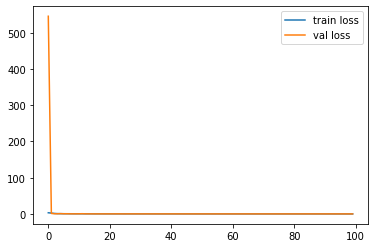

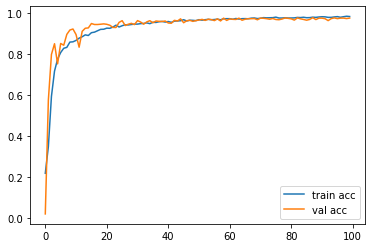

<Figure size 432x288 with 0 Axes>

In [71]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend() 
plt.show()
plt.savefig('LossVal_loss1.png')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc1.png')

In [67]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save(model_name)

In [68]:
y_pred = model.predict(test_set)
y_pred

array([[1.2651834e-12, 7.8942533e-11, 4.6051997e-13, ..., 6.7980949e-08,
        8.2917432e-12, 1.9981694e-06],
       [2.9394348e-10, 1.8337275e-10, 4.7399149e-07, ..., 5.2964225e-13,
        4.1765185e-11, 2.6677457e-11],
       [2.2269498e-06, 1.5899779e-07, 2.4928394e-07, ..., 2.0194150e-06,
        9.6052453e-08, 3.1810778e-08],
       ...,
       [4.2040958e-12, 2.7600788e-10, 2.1799089e-08, ..., 9.9788481e-01,
        1.8249045e-06, 2.4226560e-04],
       [3.1934853e-09, 1.4403907e-10, 2.4924466e-08, ..., 7.5528245e-10,
        1.3024828e-08, 2.5128195e-08],
       [7.6501095e-08, 5.9075319e-07, 2.1797997e-11, ..., 4.3320716e-12,
        1.3855465e-11, 2.3929117e-13]], dtype=float32)

In [69]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model(model_name)
new_model = tf.keras.models.load_model(model_name)

# Check its architecture
new_model.summary()


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D (None, 38, 38, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d_6[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [70]:
loss, acc = new_model.evaluate(test_set, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))


188/188 - 8s - loss: 0.0907 - accuracy: 0.9773
Restored model, accuracy: 97.73%


In [ ]:
ypred = model.predict(test_set)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(ypred)):
    if ypred[i] == test_set[i]:
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)
        
    total += 1
    
print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')